# Problem Statement

The current premium rates for XXX’s group health and life insurance plans may not fairly reflect the claims risk across departments and demographics.
Our goal is to develop a claims prediction model using features such as department, age, dependencies and gender to ensure premiums are fair and balanced, equating expected payouts with collected premiums for various deductibles.

# Import libraries and datasets

In [38]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from datetime import datetime,date 

# Importing warning
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Importing dataset
df = pd.read_csv("Health_Insurance_Data.csv")

# Intial Data Inspection

In [41]:
df

,age,sex,bmi,children,smoker,c_amt,past_c,steps,expend,past_h,salary,prof,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,Academic,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,Academic,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,Academic,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,Academic,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,Academic,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,Security,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,Technical,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,Security,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,Academic,62592.87309


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1333 non-null   float64
 4   smoker    1338 non-null   object 
 5   c_amt     1324 non-null   float64
 6   past_c    1332 non-null   float64
 7   steps     1335 non-null   float64
 8   expend    1334 non-null   float64
 9   past_h    1336 non-null   float64
 10  salary    1332 non-null   float64
 11  prof      1338 non-null   object 
 12  charges   1338 non-null   float64
dtypes: float64(10), object(3)
memory usage: 136.0+ KB


In [43]:
df.describe()

,age,bmi,children,c_amt,past_c,steps,expend,past_h,salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [44]:
# finding null values
df.isnull().astype(int)

,age,sex,bmi,children,smoker,c_amt,past_c,steps,expend,past_h,salary,prof,charges
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0,0,0,0,0,0,0,0,0,0,0,0,0
1334,0,0,0,0,0,0,0,0,0,0,0,0,0
1335,0,0,0,0,0,0,0,0,0,0,0,0,0
1336,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
df.isnull().sum()

age          9
sex          0
bmi          3
children     5
smoker       0
c_amt       14
past_c       6
steps        3
expend       4
past_h       2
salary       6
prof         0
charges      0
dtype: int64

In [46]:
# Feature names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'c_amt', 'past_c', 'steps',
       'expend', 'past_h', 'salary', 'prof', 'charges'],
      dtype='object')

# Data Cleaning

In [47]:
# we must convert this to a list
col = list(df.columns)
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'c_amt',
 'past_c',
 'steps',
 'expend',
 'past_h',
 'salary',
 'prof',
 'charges']

In [48]:
# We need to fill in the missing values with mean and mode values of each columns.
for col_name in col:
    if df[col_name].dtypes =='object':
        #object
        df[col_name] = df[col_name].fillna(df[col_name].mode()[0])
    else:
        #numeric
        df[col_name] = df[col_name].fillna(df[col_name].mean())
        
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
c_amt       0
past_c      0
steps       0
expend      0
past_h      0
salary      0
prof        0
charges     0
dtype: int64

In [49]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

In [50]:
#A summary of df so far
df.describe()

,age,bmi,children,c_amt,past_c,steps,expend,past_h,salary,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1.338000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,13.987500,6.094840,1.199606,15535.307255,7.450948,9.178297e+04,2.665309e+07,0.533184,5.656109e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.315000,0.000000,20947.645198,9.000000,8.474898e+05,4.084941e+06,1.000000,7.755085e+07,4740.287150
50%,39.310008,30.400000,1.000000,33611.286065,15.000000,9.140155e+05,7.500985e+06,1.000000,1.422756e+08,9382.033000
75%,51.000000,34.656250,2.000000,44978.873188,20.000000,9.715100e+05,1.090187e+07,1.000000,3.298713e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


# Feature Engineering
Since the features, sex, smoker and profession are all object type data, we need to perform some feature engineering


In [51]:
# Since the features, sex, smoker and profession are all object type data, we need to perform some feature engineering
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [52]:
#we replace these with numerical values
df.replace(['female','male'],[0,1], inplace = True)

In [53]:
# We now do the same for smoker and prodession
df['smoker'].unique()

array(['no', 'yes'], dtype=object)

In [54]:
# we replace these with numerical values
df['smoker'] = df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [55]:
# We use One-hot encoder for the profession feature
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, dtype = int)
profession_encoded = encoder.fit_transform(df[['prof']])

# Convert encoded data to a DataFrame with appropriate column names
profession_encoded_df = pd.DataFrame(profession_encoded, columns=encoder.categories_[0].tolist())

# Concatenate the encoded columns to the original DataFrame
df = pd.concat([df.reset_index(drop=True), profession_encoded_df], axis=1)

df

,age,sex,bmi,children,smoker,c_amt,past_c,steps,expend,past_h,salary,prof,charges,Academic,Administration,Security,Technical
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,Academic,1121.87390,1,0,0,0
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,Academic,1131.50660,1,0,0,0
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,Academic,1135.94070,1,0,0,0
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,Academic,1136.39940,1,0,0,0
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,Academic,1137.01100,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,0,35.530,0.0,1,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,Security,55135.40209,0,0,1,0
1334,31.0,0,38.095,1.0,1,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,Technical,58571.07448,0,0,0,1
1335,52.0,1,34.485,3.0,1,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,Security,60021.39897,0,0,1,0
1336,45.0,1,30.360,0.0,1,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,Academic,62592.87309,1,0,0,0


# Exploratory Data Analysis

In [56]:
df.describe()

,age,sex,bmi,children,smoker,c_amt,past_c,steps,expend,past_h,salary,charges,Academic,Administration,Security,Technical
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1.338000e+03,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.310008,0.505232,30.665112,1.090773,0.204783,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265,0.272048,0.242900,0.242900,0.242152
std,13.987500,0.500160,6.094840,1.199606,0.403694,15535.307255,7.450948,9.178297e+04,2.665309e+07,0.533184,5.656109e+08,12110.011237,0.445181,0.428995,0.428995,0.428546
min,18.000000,0.000000,15.960000,0.000000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.315000,0.000000,0.000000,20947.645198,9.000000,8.474898e+05,4.084941e+06,1.000000,7.755085e+07,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.310008,1.000000,30.400000,1.000000,0.000000,33611.286065,15.000000,9.140155e+05,7.500985e+06,1.000000,1.422756e+08,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.656250,2.000000,0.000000,44978.873188,20.000000,9.715100e+05,1.090187e+07,1.000000,3.298713e+08,16639.912515,1.000000,0.000000,0.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010,1.000000,1.000000,1.000000,1.000000


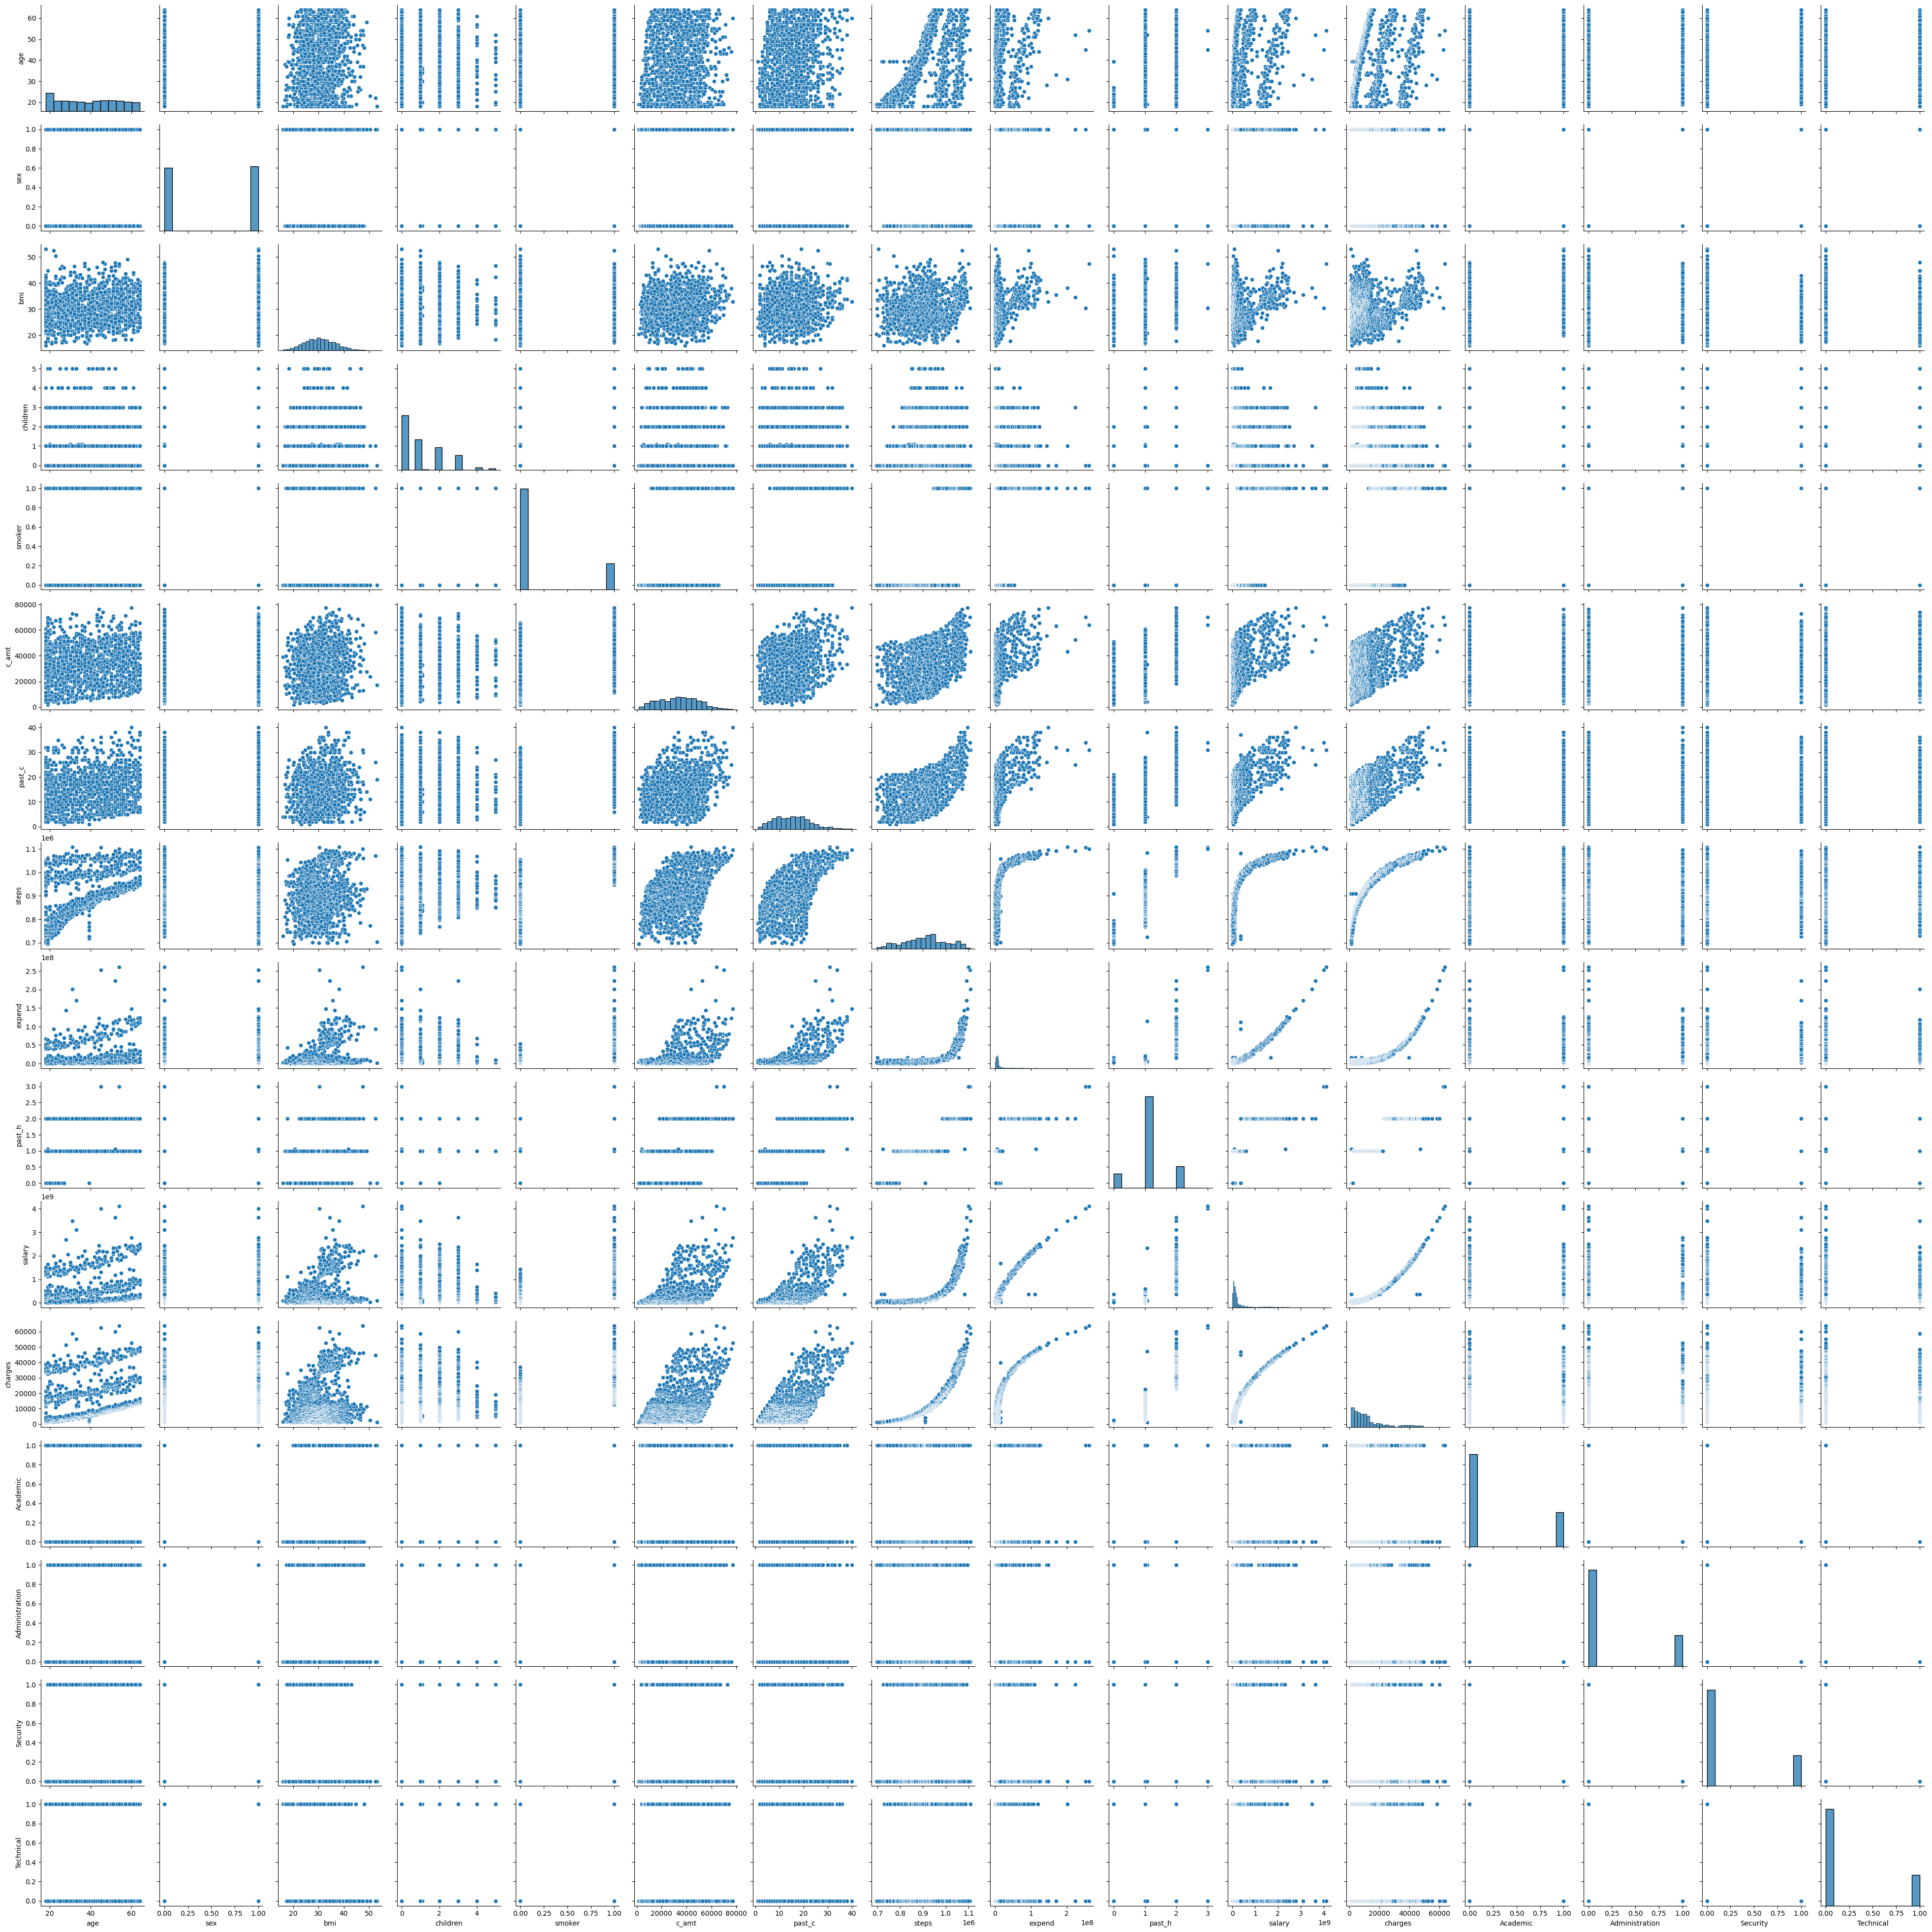

In [57]:
#pair plots
sns.pairplot(df)

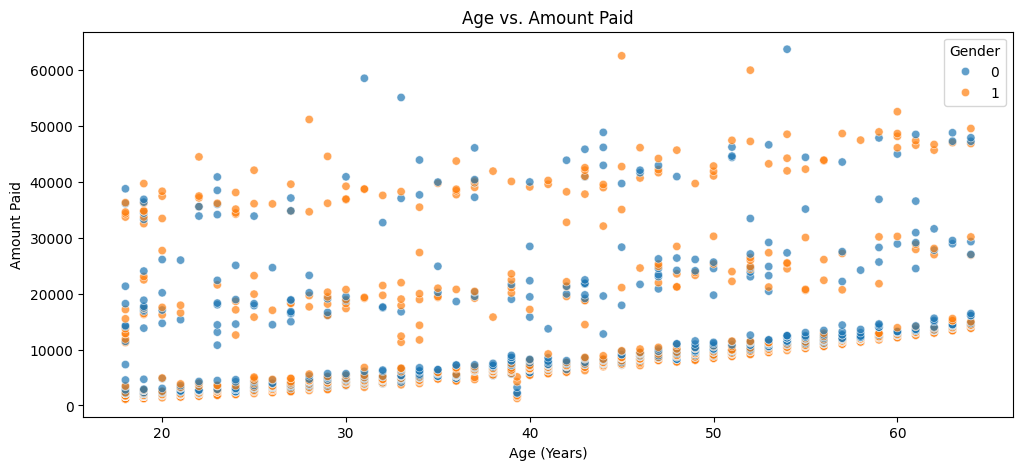

In [58]:
#Scatter Plot: Age vs. Amount Paid
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['sex'], alpha=0.7)
plt.title("Age vs. Amount Paid")
plt.xlabel("Age (Years)")
plt.ylabel("Amount Paid")
plt.legend(title="Gender")
plt.show()

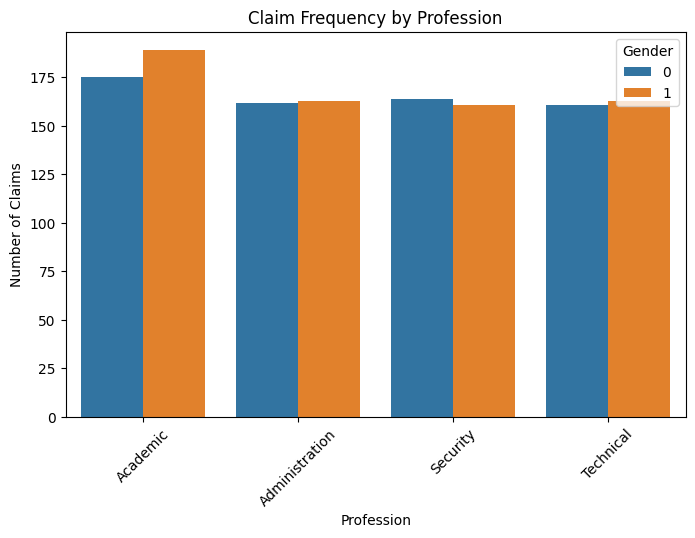

In [59]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['prof'], hue=df['sex'], data=df)
plt.title("Claim Frequency by Profession")
plt.xlabel("Profession")
plt.ylabel("Number of Claims")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()

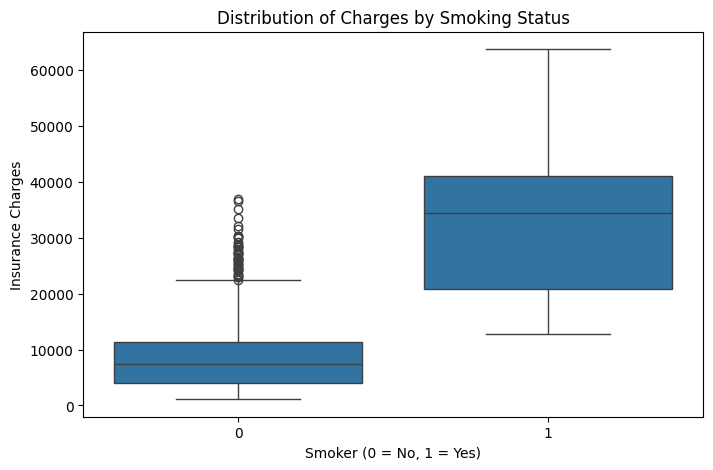

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Distribution of Charges by Smoking Status')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Insurance Charges')
plt.show()

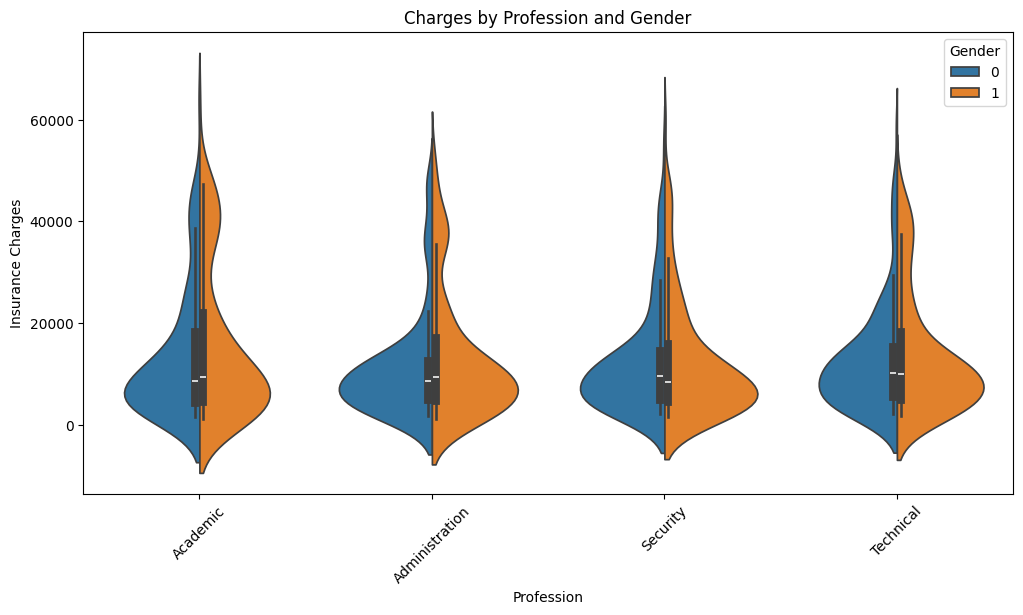

In [61]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='prof', y='charges', hue='sex', data=df, split=True)
plt.title('Charges by Profession and Gender')
plt.xticks(rotation=45)
plt.xlabel('Profession')
plt.ylabel('Insurance Charges')
plt.legend(title='Gender')
plt.show()

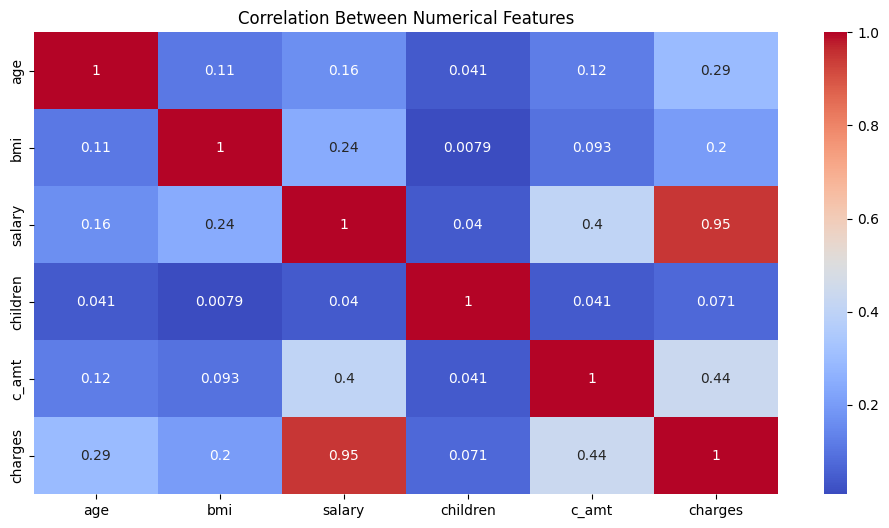

In [62]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[["age", "bmi", "salary", "children", "c_amt", "charges"]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

## Modeling Problem

We want to predict how much a person is likely to claim under their health insurance policy based on features like:

- Age
- Gender
- Smoker status
- BMI
- Salary
- Profession
- Past claims
- Physical activity (steps)
- Number of dependents, etc.

---

### 🔍 Problem Type
- **Type**: Regression (Supervised Learning)
- **Target**: `charges` (annual claim amount)
- **Goal**: Minimize prediction error

---

### Objective Function

We aim to find a model that minimizes the difference between the actual and predicted claim values:

$$
\text{Minimize:} \quad \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

Where:
- yi: actual claim for person \( i \)  
- y hat: predicted claim from the model

We also evaluate performance using:
- **MAE** (Mean Absolute Error)
- **RMSE** (Root Mean Squared Error)
- **Normalized MAE** (compared to using the overall mean as prediction)

---

### Business Application

We use the predicted claim to calculate a fair premium:

$$
\text{Premium} = \hat{y} \times (1 + \text{profit margin}) + \text{admin fee}
$$

This allows us to charge customers based on their predicted risk, ensuring fairness and profitability.

# Algorithm 1 : Professor Hosein's Distance-Based Claim Rate Predictor

In [63]:
# Step 0: Feature separation and target variable using 5-fold cross-validation
X = df.drop(columns=['charges'])
y = df['charges']

In [64]:
cat_features = ['sex','smoker','Academic','Administration','Technical','Security']
num_features = ['age','bmi','children','c_amt','past_c','steps','expend','past_h','salary']

#scaler = StandardScaler()
#df[num_features] = scaler.fit_transform(df[num_features])

In [65]:
avg_claim = y.mean()
avg_claim

np.float64(13270.422265141257)

In [66]:
# Step 1: Compute the average claim rate per feature value

# Compute average claim rate for each categorical feature
def compute_feature_claim_rates(df, features, target='charges'):
    C = {}
    for f in features:
        C[f] = df.groupby(f)[target].mean().to_dict()
    return C

C = compute_feature_claim_rates(df,X.columns, target='charges')

In [67]:
# Stage 2: Distance Metrics
def compute_distance(policy1, policy2, C, features):
    """
    Compute Euclidean distance between policy1 and 2 in claim-rate space.
    """
    d = 0.0
    for f in features:
        val1 = policy1[f]
        val2 = policy2[f]
        c1 = C[f].get(val1, 0)
        c2 = C[f].get(val2, 0)
        d += (c1 - c2) ** 2
    d ** 0.5
    return d/avg_claim  # Normalize by average claim rate

def euc_distance(policy1, policy2, C):
    """Compute Euclidean distance between two policies based on claim rate differences."""
    dist = 0

    # Compute distance for categorical features (based on claim rate differences)
    for feature in cat_features:
        value1 = policy1[feature]
        print(value1)
        value2 = policy2[feature]
        if value1 in C[feature] and value2 in C[feature]:
            d = abs(C[feature][value1] - C[feature][value2])
            dist += d**2

    # Compute distance for numerical features (direct subtraction)
    for feature in num_features:
        d = abs(policy1[feature] - policy2[feature])
        dist += d**2

    return np.sqrt(dist)  # Euclidean distance

# Example: Compute distance between two policies from the test set
policy1 = X.iloc[0]
policy2 = X.iloc[1]
print("Policy 1:")
print(policy1)
print("\nPolicy 2:")
print(policy2)
distance = compute_distance(policy1, policy2, C, X.columns[1:])
# Print the distance
print("\nDistance between two policies:")
print(distance)

Policy 1:
age                      18.0
sex                         1
bmi                     23.21
children                  0.0
smoker                      0
c_amt             29087.54313
past_c                   17.0
steps                715428.0
expend            4720920.992
past_h                    0.0
salary            55784970.05
prof                 Academic
Academic                    1
Administration              0
Security                    0
Technical                   0
Name: 0, dtype: object

Policy 2:
age                      18.0
sex                         1
bmi                     30.14
children                  0.0
smoker                      0
c_amt             39053.67437
past_c                    7.0
steps                699157.0
expend            4329831.676
past_h                    0.0
salary            13700885.19
prof                 Academic
Academic                    1
Administration              0
Security                    0
Technical                 

In [68]:
# Step 3: Compute the predicted claim rate for test policy

def predict_claim_rate(test_pol, train_set, C, features, kappa):
    dists = []
    for _, train_row in train_set.iterrows():
        d = compute_distance(test_pol, train_row, C, features)
        dists.append((d, train_row['charges']))
    
    # Apply inverse distance weighting
    numer = 0.0
    denom = 0.0
    for d, cs in dists:
        weight = 1 / ((1 + d) ** kappa)
        numer += weight * cs
        denom += weight
    return numer / denom if denom != 0 else np.mean(train_set['charges'])

# Example: Predict claim rate for a test policy
test_pol = X.iloc[0]
train_set = df.copy()
train_set['charges'] = y
kappa = 0
predicted_claim_rate = predict_claim_rate(test_pol, train_set, C, X.columns, kappa)

for i in range(0, 22):
    print(i, " : ", predict_claim_rate(test_pol, train_set, C, X.columns, i), " : ", df.iloc[0]['charges'])
# Print the predicted claim rate
print("\nPredicted claim rate for test policy:")
print(predicted_claim_rate)

0  :  13270.422265141262  :  1121.8739
1  :  1342.8167877832832  :  1121.8739
2  :  1121.8869401241532  :  1121.8739
3  :  1121.873901944241  :  1121.8739
4  :  1121.8739000005705  :  1121.8739
5  :  1121.8739000000003  :  1121.8739
6  :  1121.8739  :  1121.8739
7  :  1121.8739  :  1121.8739
8  :  1121.8739  :  1121.8739
9  :  1121.8739  :  1121.8739
10  :  1121.8739  :  1121.8739
11  :  1121.8739  :  1121.8739
12  :  1121.8739  :  1121.8739
13  :  1121.8739  :  1121.8739
14  :  1121.8739  :  1121.8739
15  :  1121.8739  :  1121.8739
16  :  1121.8739  :  1121.8739
17  :  1121.8739  :  1121.8739
18  :  1121.8739  :  1121.8739
19  :  1121.8739  :  1121.8739
20  :  1121.8739  :  1121.8739
21  :  1121.8739  :  1121.8739

Predicted claim rate for test policy:
13270.422265141262


In [ ]:
# Step 4: Evaluate the model using kappa parameter tuning
def tune_kappa(df, features, target='charges', kappa_range=range(1, 21)):

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    kappa_errors = {}

    for kappa in kappa_range:
        preds = []
        actuals = []
        base = []

        for train_idx, val_idx in kf.split(df):
            train_df = df.iloc[train_idx].copy()
            val_df = df.iloc[val_idx].copy()

            for _, test_row in val_df.iterrows():
                pred = predict_claim_rate(test_row, train_df, C, features, kappa)
                preds.append(pred)
                actuals.append(test_row[target])
                base.append(train_df[target].mean())  # mean as baseline

        # Normalized MAE
        mae_model = mean_absolute_error(actuals, preds)
        mae_baseline = mean_absolute_error(actuals, base)
        normalized_mae = mae_model / mae_baseline if mae_baseline != 0 else np.inf

        kappa_errors[kappa] = normalized_mae

    best_kappa = min(kappa_errors, key=kappa_errors.get)
    return kappa_errors, best_kappa

kappa_errors, best_kappa = tune_kappa(df, X.columns, target='charges')
print(f"Best κ: {best_kappa}")
print("κ errors:", kappa_errors)

Best κ: 4
κ errors: {1: 0.3495073655477194, 2: 0.08930905735227422, 3: 0.060303181365429004, 4: 0.057844502961176235, 5: 0.05925974325686046, 6: 0.06091546463175666, 7: 0.062448304163828454, 8: 0.0637250946150906, 9: 0.0647303592168095}


In [70]:
def evaluate_feature_importance(df, features, target='charges', kappa=4):
    if isinstance(features, str):
        features = [features]  # Wrap single feature in list

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    errors = []

    for train_idx, val_idx in kf.split(df):
        train_df = df.iloc[train_idx].copy()
        val_df = df.iloc[val_idx].copy()

        # Recompute feature-specific average claim rates
        C = compute_feature_claim_rates(train_df, features, target)

        preds = []
        actuals = []

        for _, row in val_df.iterrows():
            pred = predict_claim_rate(row, train_df, C, features, kappa)
            preds.append(pred)
            actuals.append(row[target])

        base = [train_df[target].mean()] * len(actuals)
        mae_model = mean_absolute_error(actuals, preds)
        mae_baseline = mean_absolute_error(actuals, base)
        errors.append(mae_model / mae_baseline)

    return np.mean(errors)

In [71]:
important_features = {}
for f in X.columns:
    error = evaluate_feature_importance(df, f)
    important_features[f] = error

# Sort and view
sorted_features = sorted(important_features.items(), key=lambda x: x[1])
for feature, error in sorted_features:
    print(f"{feature}: E(4) = {error:.4f}")

past_h: E(4) = 0.4679
smoker: E(4) = 0.6239
past_c: E(4) = 0.7114
age: E(4) = 0.9913
Administration: E(4) = 0.9987
prof: E(4) = 0.9993
Academic: E(4) = 0.9996
sex: E(4) = 1.0002
Security: E(4) = 1.0004
Technical: E(4) = 1.0004
children: E(4) = 1.0014
bmi: E(4) = 1.2482
c_amt: E(4) = 1.3178
salary: E(4) = 1.3179
steps: E(4) = 1.3182
expend: E(4) = 1.3197


In [72]:
def greedy_feature_selection(df, feature_list, target='charges', kappa=4):
    selected = []
    prev_error = np.inf
    for f in feature_list:
        trial = selected + [f]
        error = evaluate_feature_importance(df, trial, target, kappa)
        if error < prev_error:
            selected.append(f)
            prev_error = error
        else:
            print(f"Skipping {f} as it worsens performance.")
    return selected

In [73]:
# Sort and extract just the feature names
sorted_features = sorted(important_features.items(), key=lambda x: x[1])
sorted_feature_names = [f[0] for f in sorted_features]

# Run greedy selection
final_features = greedy_feature_selection(df, sorted_feature_names)

# Tune kappa on selected features
kappa_errors, best_kappa = tune_kappa(df, final_features)

Skipping Administration as it worsens performance.
Skipping Academic as it worsens performance.
Skipping sex as it worsens performance.
Skipping Security as it worsens performance.
Skipping Technical as it worsens performance.
Skipping bmi as it worsens performance.
Skipping c_amt as it worsens performance.
Skipping salary as it worsens performance.
Skipping steps as it worsens performance.
Skipping expend as it worsens performance.


In [74]:
def interpret_feature_impact(df, test_row, target='charges', kappa=4):
    impacts = {}
    avg_claim = df[target].mean()

    for f in test_row.index:
        if f not in df.columns:
            continue
        C_f = compute_feature_claim_rates(df, [f], target)
        val = test_row[f]
        mean_val = C_f[f].get(val, avg_claim)
        impacts[f] = mean_val / avg_claim

    return impacts

In [75]:
impacts = interpret_feature_impact(df, X.iloc[0], target='charges', kappa=10)
print("Feature impacts on claim rate:")
for feature, impact in impacts.items():
    print(f"{feature}: {impact:.4f}")

Feature impacts on claim rate:
age: 0.5340
sex: 1.0517
bmi: 0.8063
children: 0.9318
smoker: 0.6356
c_amt: 0.0845
past_c: 1.1307
steps: 0.0845
expend: 0.0845
past_h: 0.1412
salary: 0.0845
prof: 1.1104
Academic: 1.1104
Administration: 1.0223
Security: 1.0206
Technical: 0.9967


In [76]:
# Final feature selection
final_features

['past_h', 'smoker', 'past_c', 'age', 'prof', 'children']

In [80]:
print(f"Selected Features: {final_features}")
print(f"Optimal κ: {best_kappa}")
print("Normalized MAE across κ values:")
for k, err in kappa_errors.items():
    print(f"κ = {k}: E(κ) = {err:.4f}")

Selected Features: ['past_h', 'smoker', 'past_c', 'age', 'prof', 'children']
Optimal κ: 2
Normalized MAE across κ values:
κ = 1: E(κ) = 0.3508
κ = 2: E(κ) = 0.2611
κ = 3: E(κ) = 0.2684
κ = 4: E(κ) = 0.2755
κ = 5: E(κ) = 0.2800
κ = 6: E(κ) = 0.2826
κ = 7: E(κ) = 0.2843
κ = 8: E(κ) = 0.2855
κ = 9: E(κ) = 0.2863


# Algorithm 2: Random Forest Regressor

In [83]:
df.drop(columns=['prof'], inplace=True)

In [84]:
# Split the data into training and testing sets
X_rf = df.drop(columns=['charges'])
y_rf = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [85]:
# Model training
model_rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [86]:
# Model evaluation
y_pred = model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = mean_squared_error(y_test, y_pred) ** 0.5
baseline_mae = mean_absolute_error(y_test, [y_train.mean()] * len(y_test))
normalized_mae_rf = mae_rf / baseline_mae

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Normalized MAE: {normalized_mae_rf:.4f}")

Random Forest MAE: 454.26
Random Forest RMSE: 1342.71
Normalized MAE: 0.0486


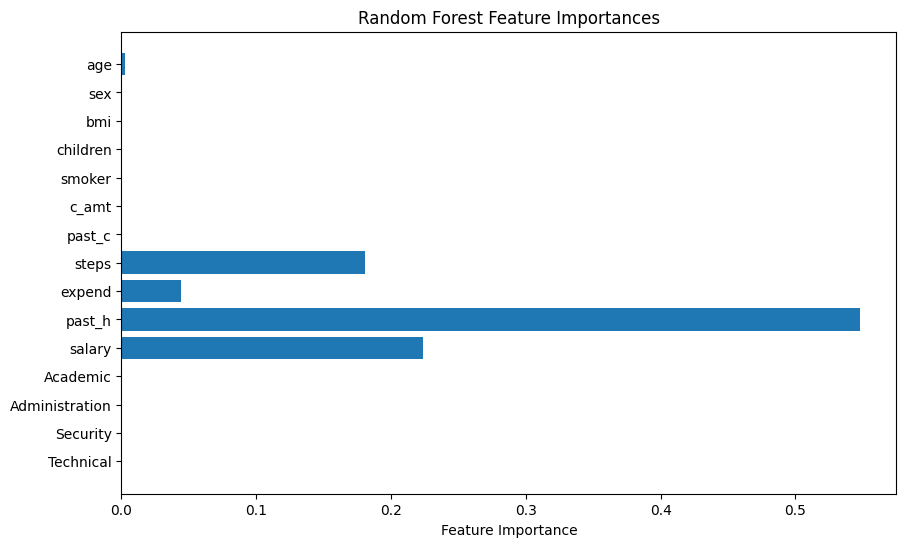

In [87]:
importances = model_rf.feature_importances_
features = X_rf.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.show()

# Algorithm 3 : XGBoost

In [88]:
X_xgb = df.drop(columns=['charges'])
y_xgb = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

In [89]:
model_xgb = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [90]:
y_pred_xgb = model_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb) ** 0.5
baseline_mae = mean_absolute_error(y_test, [y_train.mean()] * len(y_test))
normalized_mae_xgb = mae_xgb / baseline_mae

print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"Normalized MAE: {normalized_mae_xgb:.4f}")

XGBoost MAE: 449.55
XGBoost RMSE: 1047.02
Normalized MAE: 0.0481


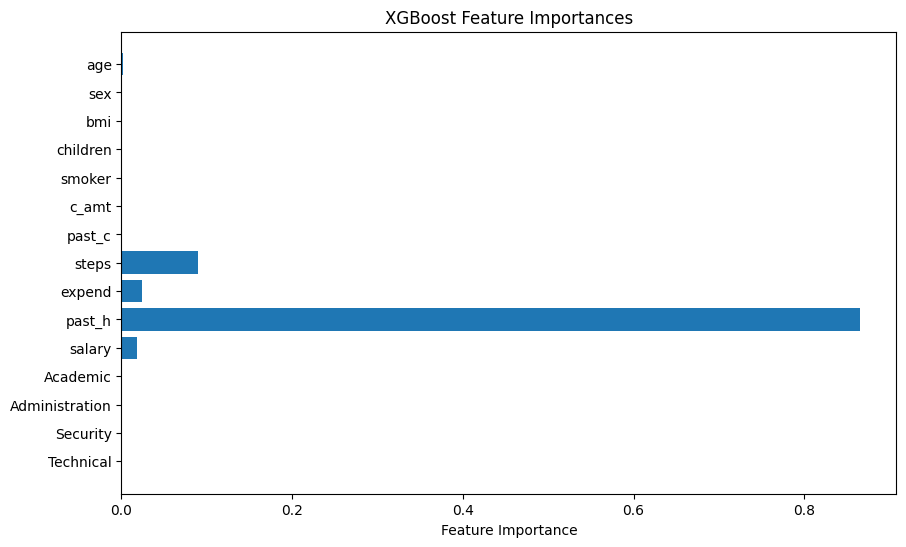

In [91]:
plt.figure(figsize=(10, 6))
plt.barh(X_xgb.columns, model_xgb.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importances")
plt.gca().invert_yaxis()
plt.show()

# Model Evalution

This project aimed to develop a predictive model for insurance claims using demographic and departmental features to support fair and data-driven premium pricing. We evaluated three different modeling approaches: Hosein’s distance-based estimator, Random Forest, and XGBoost.

**Model Performance Summary**:
- **Hosein’s Distance-Based Predictor** achieved strong interpretability and a normalized MAE of approximately 0.2611, but suffered from high computational overhead and weaker robustness with limited features.
- **Random Forest Regressor** outperformed Hosein's model in accuracy with a normalized MAE of 0.0486 and provided intuitive feature importance plots.
- **XGBoost Regressor** delivered the lowest error (normalized MAE of 0.0481), indicating it captured non-linear feature interactions most effectively.

**Key Observations**:
- **Smoker status**, **profession**, and **past claims** were consistently top predictors across models.
- Certain groups (e.g., smokers, specific departments) had higher predicted claims, suggesting current premium structures may under/overcharge some categories.
- Hosein’s model stood out in interpretability, making it useful when transparency in pricing is crucial.

**Recommendations**:
- For **accuracy-critical applications**, use **XGBoost**, especially when fairness is calibrated separately.
- For **interpretable, transparent pricing** in regulated environments, **Hosein’s model** is highly valuable.
- Future work should explore incorporating temporal features (e.g., claim trends) and fairness metrics directly into the optimization objective.

Overall, this comparative modeling approach provides actionable insights into premium fairness and supports better-aligned pricing for the organization and its clients.